In [1]:
# import require libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


**About Data Set Attributes**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea




# EDA on Data Set

In [2]:
df= pd.read_csv("housing.csv")


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# check the shape
df.shape

(20640, 10)

In [5]:
#check type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#check null value in columns
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.isnull().sum().sum()

207

In [8]:
#Check duplicate values
df.duplicated().sum()

0

No Duplicate value

In [9]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [10]:
df['total_bedrooms'].dtype

dtype('float64')

In [11]:
#check memeory used
df.memory_usage()

Index                    128
longitude             165120
latitude              165120
housing_median_age    165120
total_rooms           165120
total_bedrooms        165120
population            165120
households            165120
median_income         165120
median_house_value    165120
ocean_proximity       165120
dtype: int64

# Treat null values

In [12]:
#take Median
median=df.total_bedrooms.median()
median

435.0

In [13]:
# create a copy 
df_copy=df.copy()

In [14]:
df_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
#Drop All Columns with Any Missing Value
df_copy = df_copy.dropna(axis=1)
df_copy

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
# all missing values are trated
df_copy.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df_copy.shape

(20640, 9)

# Fill null values with median

In [18]:
# crate a copy 
df_copy= df.copy()

In [19]:
# check shape
df_copy.shape

(20640, 10)

In [20]:
df_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
median=df.total_bedrooms.median()
median

435.0

In [22]:
df_copy["total_bedrooms"]=df_copy["total_bedrooms"].fillna(df_copy["total_bedrooms"].median())
#df['col1'] = df['col1'].fillna(df['col1'].median())

In [23]:
# dataset has no null value
df_copy.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
df_copy.shape

(20640, 10)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
#check staistics
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [27]:
df_copy.cov()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.807886e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-5.955635e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.683911e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.482135e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.078858,-59.556355,-1683.910513,8.482135e+05,1.758895e+05,4.148814e+05,1.562357e+05,-6.068896,2.393514e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.148814e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.562357e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.068896e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.393514e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


In [28]:
df_copy.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


# Graph visulization

<AxesSubplot:>

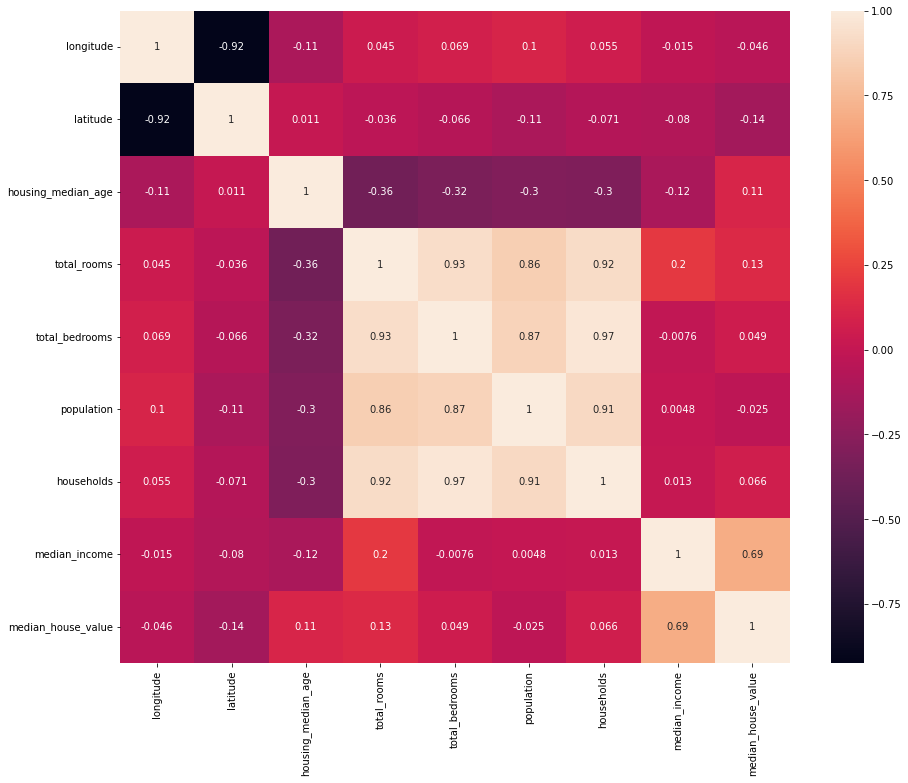

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df_copy.corr(), annot=True)

In [30]:
#seperate categorical features
cat_feature =[feature for feature in df.columns if df_copy[feature].dtype == 'O']
cat_feature

['ocean_proximity']

In [31]:
#seperate numerical features
numric_feature= [fea for fea in df.columns if df_copy[fea].dtypes!='O']

In [32]:
numric_feature

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

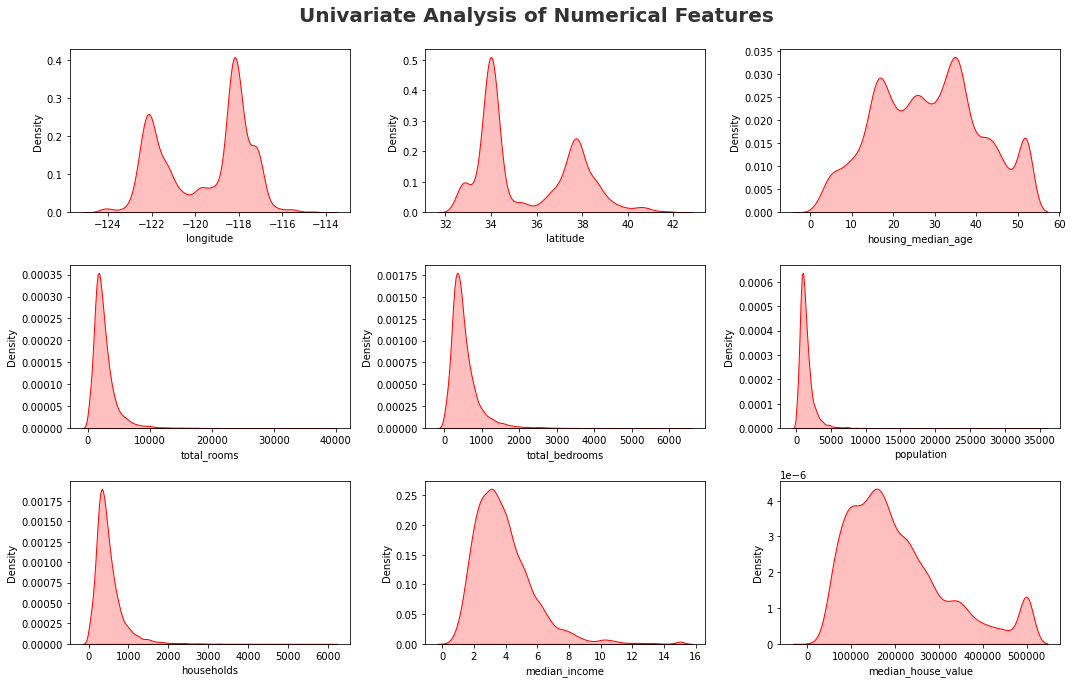

In [33]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numric_feature[i]],shade=True, color='r')
    plt.xlabel(numric_feature[i])
    plt.tight_layout()

## Observations
*total_bedrooms-median,total_rooms,total_bedrooms,population,population has positive skew

In [34]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

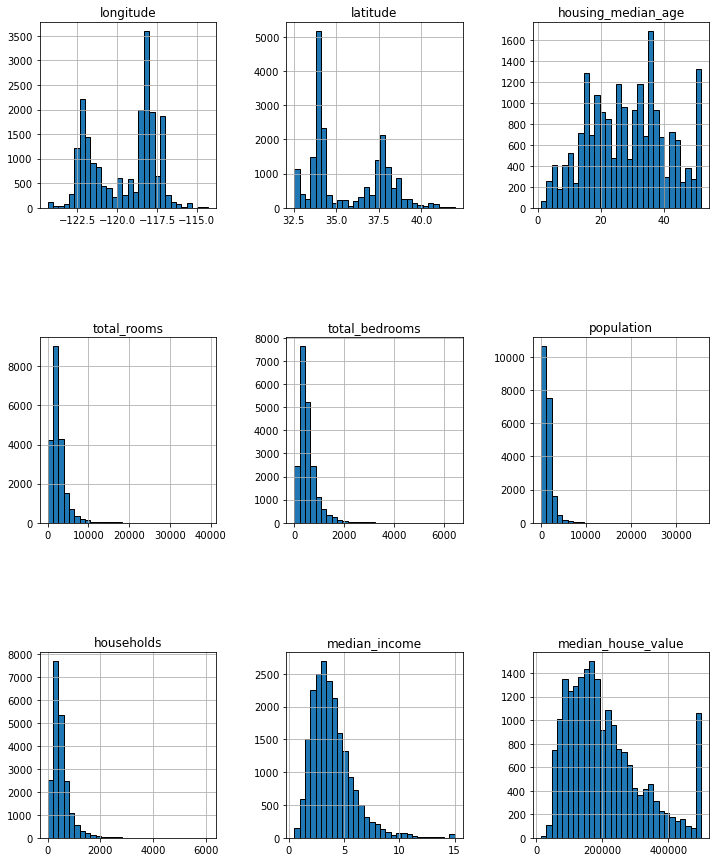

In [35]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 15),  bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

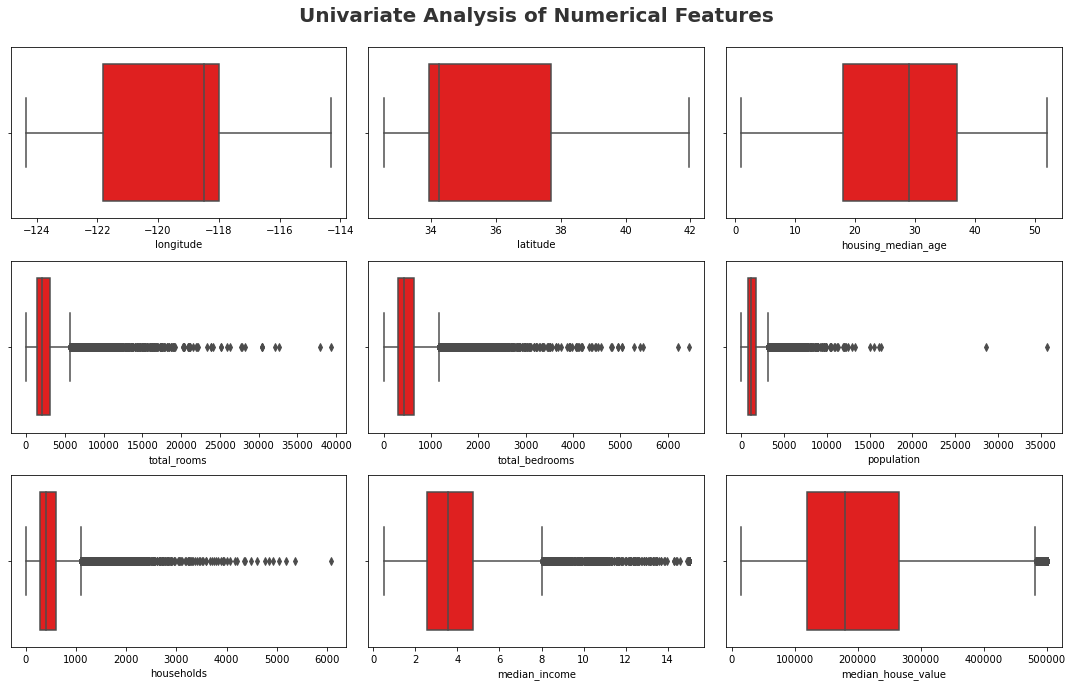

In [36]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numric_feature)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df_copy[numric_feature[i]], color='r')
    plt.xlabel(numric_feature[i])
    plt.tight_layout()

In [37]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [38]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

the ocean_proximity is minimum for Island and maximum for <1H OCEAN

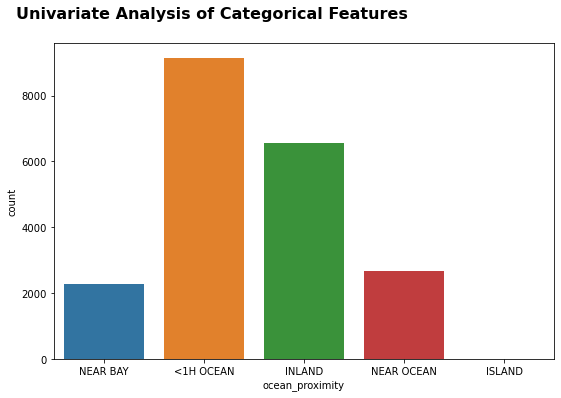

In [39]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=16,fontweight= 'bold', x=0.2,y=1.)
for i in range(0,len(cat_feature)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat_feature[i]])
    plt.xlabel(cat_feature[i])
    plt.tight_layout()

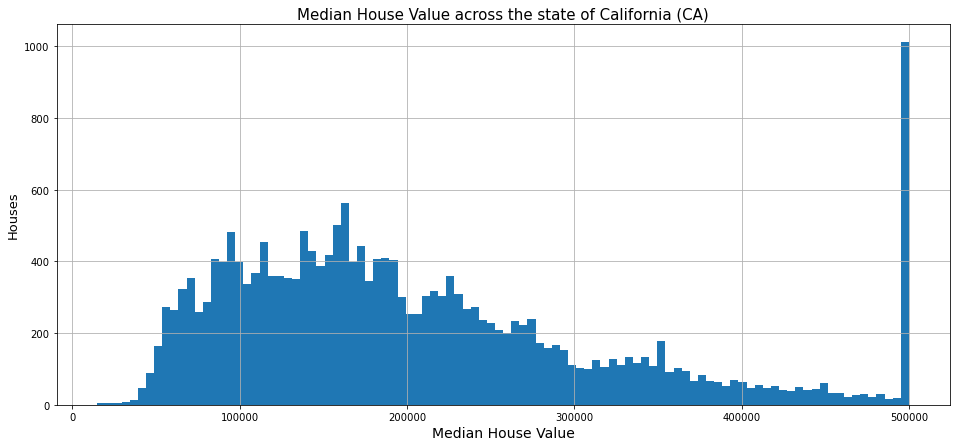

In [40]:
plt.figure(figsize=(16,7))

df_copy['median_house_value'].hist(bins=100)
plt.xlabel("Median House Value", fontsize=14)
plt.ylabel("Houses", fontsize=13)
plt.xticks(rotation=0)
plt.title("Median House Value across the state of California (CA)", fontsize=15)
plt.show() 

In [41]:
import seaborn as sns

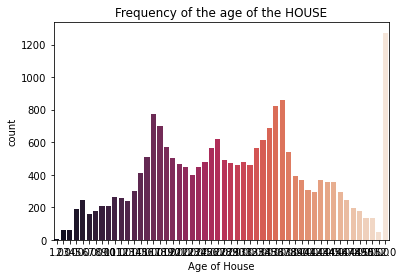

In [42]:
# Plot
sns.countplot(data=df_copy, x="housing_median_age",  palette="rocket").set(
    title = "Frequency of the age of the HOUSE",
    xlabel = "Age of House"
)

# Show
plt.show()

<Figure size 1800x1080 with 0 Axes>

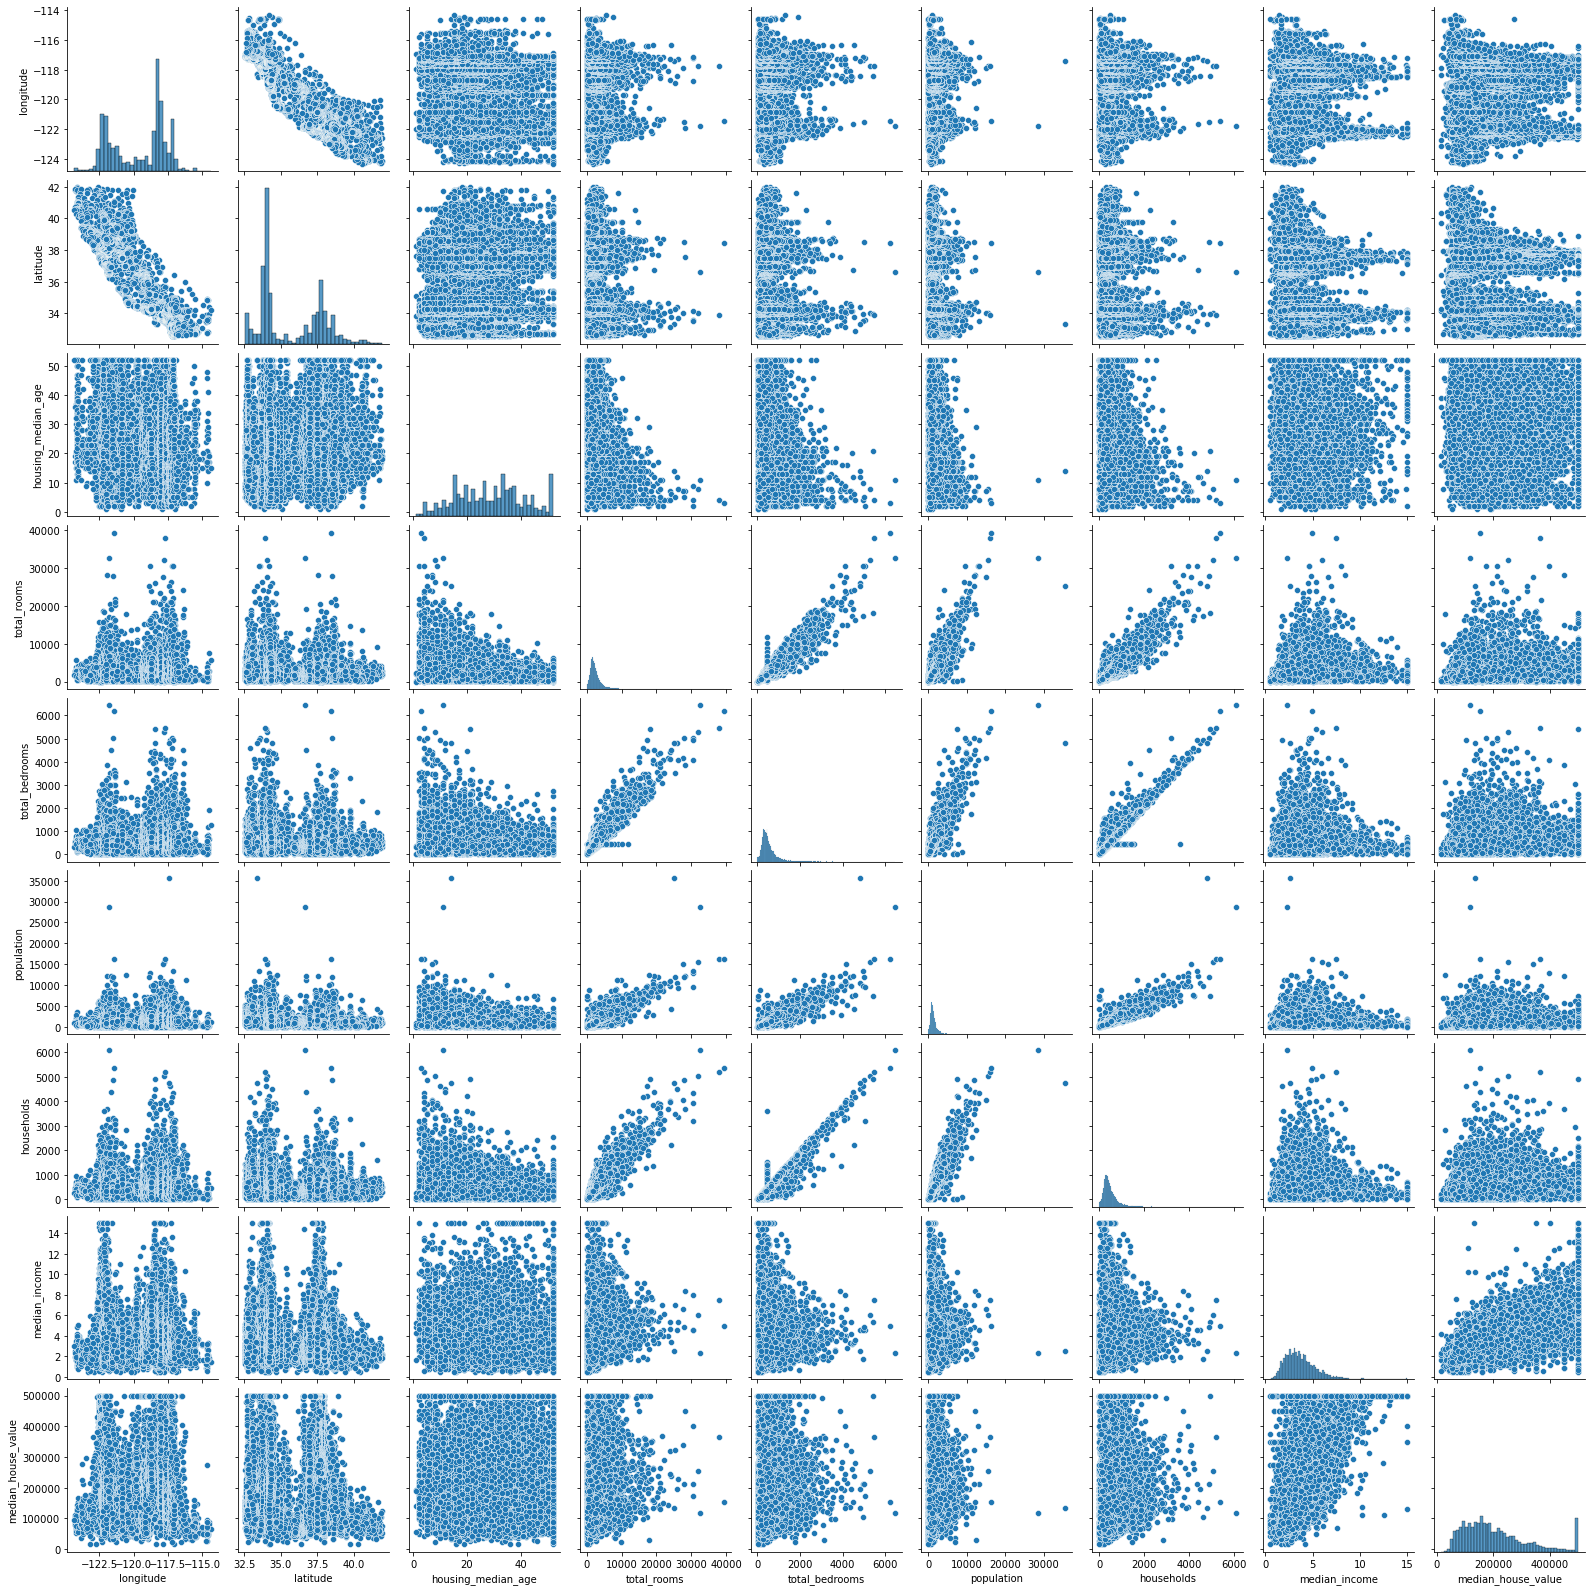

In [43]:
# Get pair values
plt.figure(figsize=(25,15))

# Plot
sns.pairplot(df_copy)

# Show
plt.show()

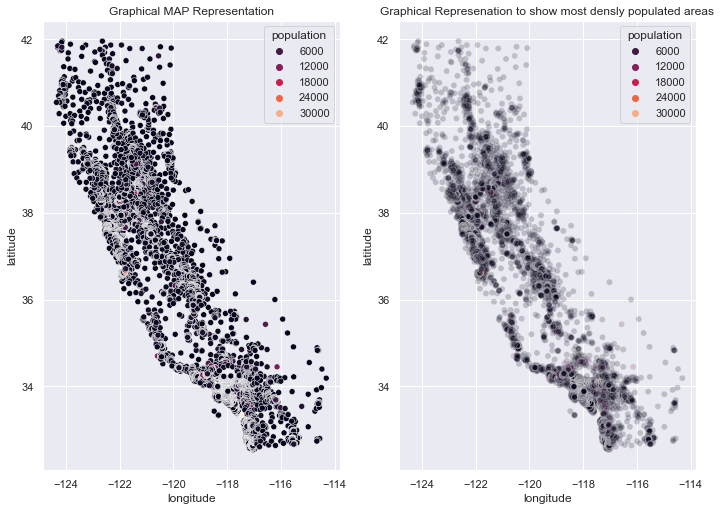

In [44]:
# Get the longitudinal & latitudinal graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 2)

# Plot
sns.scatterplot(data=df_copy, x="longitude", y="latitude", hue="population", ax=axes[0],  palette="rocket").set(
    title = "Graphical MAP Representation"
)
sns.scatterplot(data=df_copy, x="longitude", y="latitude", hue="population", alpha=0.2, ax=axes[1],  palette="rocket").set(
    title = "Graphical Represenation to show most densly populated areas"
)

# Show 
plt.show()



ANALYSIS
* We obeserve that the mostly densly populated areas are near San Diago & Los Angelos and San Fransisco. Very little population near and Las Vegas. City of Redding is also sparsely populated. 


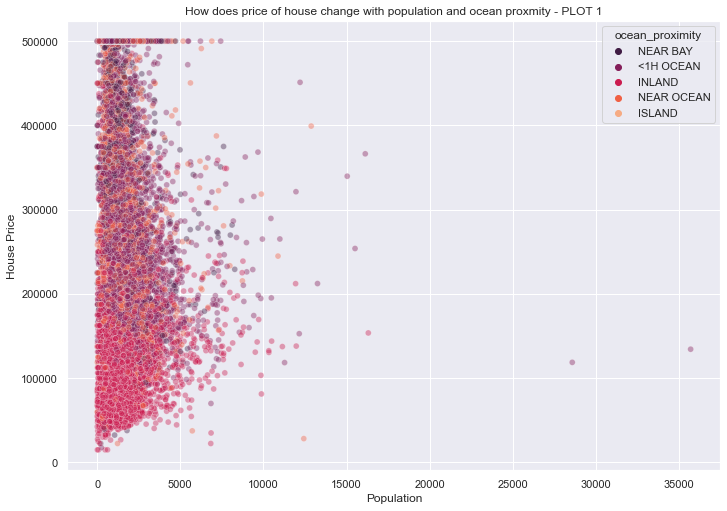

In [47]:

# Plot
sns.scatterplot(data=df_copy, x="population", y="median_house_value", hue="ocean_proximity", palette="rocket", alpha=0.4).set(
    title = "How does price of house change with population and ocean proxmity - PLOT 1",
    xlabel = "Population",
    ylabel = "House Price"
)
# Show 
plt.show()



# Observations:
** We obeserve that most of the houses are Inland, with a price between 30,000 to 160,000. Most of the near bay and <1H Ocean as well as Near Ocean are around 300,000-500,000. Island seems to be in every price range.

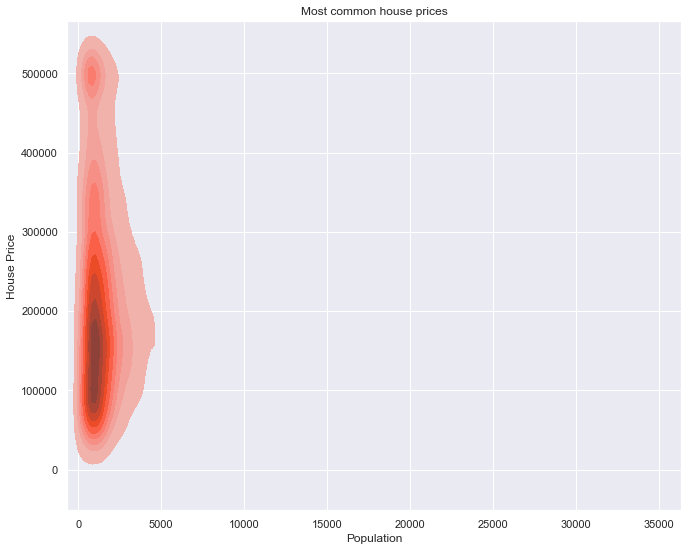

In [52]:
# The most common house prices
sns.set(rc={'figure.figsize':(11,9)})

# Plot
sns.kdeplot(x='population', y='median_house_value', data = df_copy, fill="True", color="salmon").set(
    title = "Most common house prices",
    xlabel = "Population",
    ylabel = "House Price"
)

# Show
plt.show()



# Observations:
** We observe that mostly house prices in CA, lie between 50,000-280,000 nearly.